<a href="https://colab.research.google.com/github/hanrach/marked-beetle-analysis/blob/main/image_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import glob
import shutil
import json
import keras
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
from keras.preprocessing.image import ImageDataGenerator

import cv2
from sklearn.model_selection import train_test_split


# Load Data

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
imagesfilenames = os.listdir("/content/drive/MyDrive/MarkedBeetleImageAnalysis")

In [46]:
os.chdir("/content/drive/MyDrive/MarkedBeetleImageAnalysis")

In [47]:
len(imagesfilenames)

1054

# Build data

In [48]:
PaperedControl = glob.glob('PaperedControl*.tif')

In [49]:
PaperedTransparent = glob.glob('PaperedTransparent*.tif')

In [50]:
# labeled?
PinkPapierMache = [f for f in glob.glob('PinkPapierMache*.tif') if "Mixed" not in f]

In [51]:
NoPaperedGreen = glob.glob('NoPaperedGreen*.tif')

In [52]:
# labeled?
PinkPaintedPaper = glob.glob('PinkPaintedPaper*.tif')

In [53]:

NoPaperedMixed = glob.glob('NoPaperedMixed*.tif')

In [54]:
PaperedMixed = glob.glob('PaperedMixed*.tif')

In [55]:
#labeled?
PinkPapierMacheMixed = glob.glob('PinkPapierMacheMixed*.tif')

In [56]:
# Not labeled
Trap = glob.glob('Trap*.tif')

In [57]:
len(PinkPaintedPaper) + len(PinkPapierMache) + len(PinkPapierMacheMixed) + len(Trap)

252

In [58]:
len(PaperedControl) + len(PaperedTransparent) + + len(PaperedMixed) + \
len(NoPaperedGreen) + len(NoPaperedMixed)+ len(PinkPaintedPaper)  + len(PinkPapierMache)    + len(Trap) + len(PinkPapierMacheMixed)

1053

In [59]:
len(imagesfilenames)

1054

In [60]:
marked = PaperedControl +PaperedTransparent + PaperedMixed+ PinkPaintedPaper + PinkPapierMache + PinkPapierMacheMixed 
unmarked = NoPaperedGreen + NoPaperedMixed 

In [61]:
# Leave out Trap (unmarked)
df = pd.DataFrame({
    "filename": marked + unmarked ,
    "category": ['Marked']*len(marked) + ['Unmarked']*len(unmarked) 
})

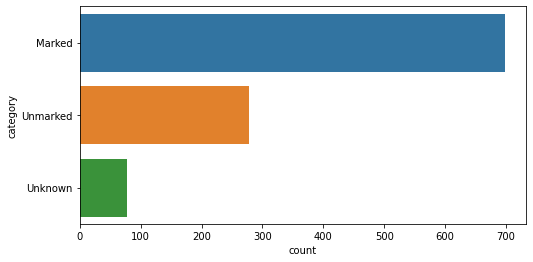

In [168]:
plt.figure(figsize=(8, 4))
sns.countplot(y="category", data=df);

In [62]:
train_df, validate_df = train_test_split(df, test_size = 0.10, random_state = 42, stratify = df['category'])
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [68]:
train_df

,filename,category
0,PinkPapierMacheMixed39v.tif,Marked
1,PaperedMixed14d.tif,Marked
2,PaperedControl66d.tif,Marked
3,PaperedControl51v.tif,Marked
4,PinkPapierMacheMixed30d.tif,Marked
...,...,...
873,PaperedControl60v.tif,Marked
874,PaperedTransparent17v.tif,Marked
875,NoPaperedMixed34v.tif,Unmarked
876,PinkPapierMache25d.tif,Marked


# Keras preprocessing functions

In [66]:
def visualize_img(img):
    image = np.array(img)
    return image / 255

In [12]:
IMG_SIZE = (180,180)
BATCH_SIZE = 32

In [165]:
datagen = ImageDataGenerator(
    preprocessing_function=visualize_img,
    brightness_range=[0.7,2.0],
                    )

In [166]:
sample_df=train_df.iloc[[2]]

In [167]:
batches = datagen.flow_from_dataframe(sample_df,
                             directory = "/content/drive/MyDrive/MarkedBeetleImageAnalysis",

                             x_col = 'filename',
                             y_col = 'category',
                             target_size = IMG_SIZE,
                             #color_mode="rgb",
                             class_mode = 'categorical',
                             
                            )

Found 1 validated image filenames belonging to 1 classes.


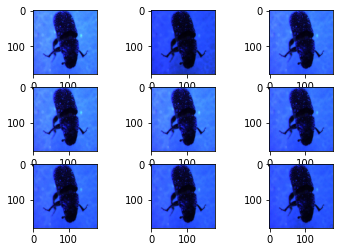

In [168]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	xbatch, ybatch = next(batches)
	# convert to unsigned integers for viewing
	image = xbatch[0]
	# plot raw pixel data
	plt.imshow(image)

In [158]:
datagen_center = ImageDataGenerator(
    preprocessing_function=visualize_img,
    zoom_range = [0.5, 1.0]
                    )

In [159]:
batches2 = datagen_center.flow_from_dataframe(sample_df,
                             directory = "/content/drive/MyDrive/MarkedBeetleImageAnalysis",

                             x_col = 'filename',
                             y_col = 'category',
                             target_size = IMG_SIZE,
                             #color_mode="rgb",
                             class_mode = 'categorical',
                             
                            )

Found 1 validated image filenames belonging to 1 classes.


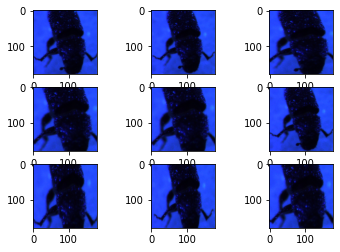

In [160]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	xbatch, ybatch = next(batches2)
	# convert to unsigned integers for viewing
	image = xbatch[0]
	# plot raw pixel data
	plt.imshow(image)